Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
def loop_categories(df):
    for i in df.columns:
        if df[i].dtype != int or df[i].dtype != float:
            categories = df[i].unique()
            for j in categories:
                df[i] = df[i].replace(j, categories.tolist().index(j))
    return df

In [3]:
df=pd.read_csv('train.csv')
df = loop_categories(df)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0,0,0,38,205,0,0,0,0,0.0,0,0
1,1,0,0,1,1,0,1,1,0,0.0,0,0
2,2,0,1,2,2,0,0,2,0,0.0,0,0
3,3,0,1,3,3,0,0,3,0,0.0,0,0
4,4,1,0,1,4,0,0,3,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
757,4,0,3,4,36,0,0,59,0,32.0,1,1
758,38,0,2,39,132,1,0,94,0,42.0,1,1
759,27,0,2,1,212,0,0,39,1,32.0,1,1
760,27,1,0,1,154,0,2,34,0,0.0,1,1


In [4]:
X,y=df.iloc[:, :-1],df.HeartDisease
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33, random_state=42)
clf = DecisionTreeClassifier(max_depth=4, random_state=0,splitter='random')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

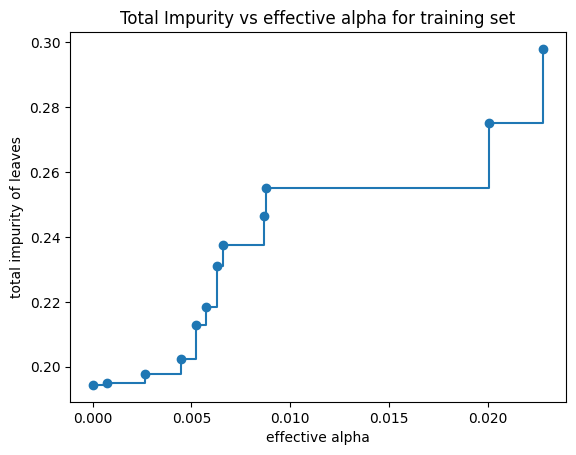

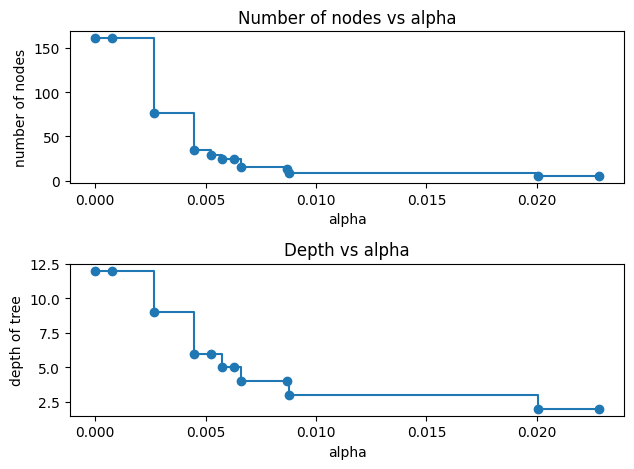

In [5]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure()
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")
plt.title("Total Impurity vs effective alpha for training set")
plt.show()

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()
plt.show()

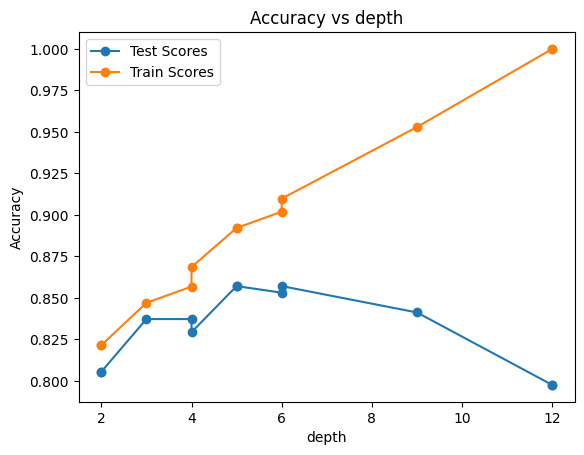

In [6]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(1, 1)

ax.plot(depth, test_scores, marker='o', label='Test Scores')
ax.plot(depth, train_scores, marker='o', label='Train Scores')

ax.set_xlabel('depth')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy vs depth')

ax.legend()

plt.show()

In [7]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.00447761)
clf.fit(X_train, y_train)
print('clf.score(X_train, y_train) ={}'.format(clf.score(X_train, y_train)))
print('clf.score(X_test, y_test) ={}'.format(clf.score(X_test, y_test)))
DTClassifier_acc_X_train = clf.score(X_train, y_train)
DTClassifier_acc_X_test = clf.score(X_test, y_test)

clf.score(X_train, y_train) =0.9098039215686274
clf.score(X_test, y_test) =0.8571428571428571


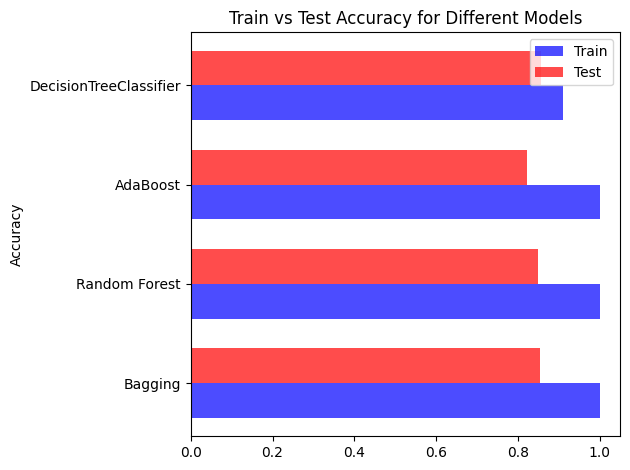

In [8]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
random_forest_clf = RandomForestClassifier(n_estimators=50, random_state=42)
adaboost_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)


bagging_clf.fit(X_train, y_train)
bagging_train_accuracy = bagging_clf.score(X_train, y_train)
bagging_test_accuracy = bagging_clf.score(X_test, y_test)

random_forest_clf.fit(X_train, y_train)
random_forest_train_accuracy = random_forest_clf.score(X_train, y_train)
random_forest_test_accuracy = random_forest_clf.score(X_test, y_test)

adaboost_clf.fit(X_train, y_train)
adaboost_train_accuracy = adaboost_clf.score(X_train, y_train)
adaboost_test_accuracy = adaboost_clf.score(X_test, y_test)

models = ['Bagging', 'Random Forest', 'AdaBoost','DecisionTreeClassifier']
train_accuracies = [bagging_train_accuracy, random_forest_train_accuracy, adaboost_train_accuracy,DTClassifier_acc_X_train]
test_accuracies = [bagging_test_accuracy, random_forest_test_accuracy, adaboost_test_accuracy,DTClassifier_acc_X_test]

x = np.arange(len(models))  
width = 0.35 

fig, ax = plt.subplots()

rects1 = ax.barh(x - width/2, train_accuracies, width, label='Train',alpha=0.7,color='blue')
rects2 = ax.barh(x + width/2, test_accuracies, width, label='Test', color='red',alpha=0.7)


ax.set_ylabel('Accuracy')
ax.set_title('Train vs Test Accuracy for Different Models')
ax.set_yticks(x)
ax.set_yticklabels(models)
ax.legend()

fig.tight_layout()

plt.show()


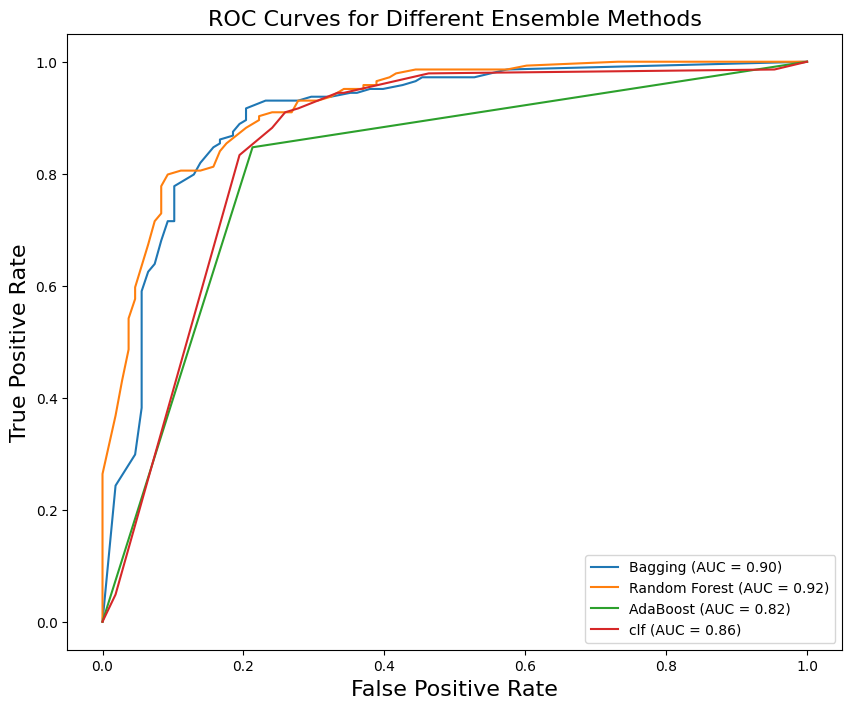

In [22]:

# Initialize lists to hold false positive rates, true positive rates, and AUC values for different ensemble methods
fpr_ensembles = []
tpr_ensembles = []
auc_ensembles = []
labels = []

# List of models
models = [
    ("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)),
    ("Random Forest", RandomForestClassifier(n_estimators=50, random_state=42)),
    ("AdaBoost", AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)),
    ("DecisionTreeClassifier",DecisionTreeClassifier(ccp_alpha=0.00447761, random_state=0, splitter='random'))
]
# Loop over different ensemble methods
for label, model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict probabilities
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Compute the ROC curve
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    fpr_ensembles.append(fpr)
    tpr_ensembles.append(tpr)
    
    # Compute the area under the ROC curve
    auc = metrics.auc(fpr, tpr)
    auc_ensembles.append(auc)
    labels.append(label)

# Plotting the ROC curves
plt.figure(figsize=(10, 8))

# Loop through and plot each ROC curve
for i, label in enumerate(labels):
    plt.plot(fpr_ensembles[i], tpr_ensembles[i], label=f'{label} (AUC = {auc_ensembles[i]:.2f})')

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC Curves for Different Ensemble Methods', fontsize=16)
plt.legend(loc="lower right")
plt.show()
